# Where do probability come from?

In most situation, however, the true distribution are unknown and must beestimated from data

Two approaches are commonly used:
    1. Parametric estimation
    2. Non-parametric density estimation

# Parametric estimation


The Maximum Likelihood Estimation (MLE) is a technique that uses the training data to estimate parameter values for a particular distribution. A popular example would be to estimate the mean and variance of a Normal distribution by computing it from the training data.

MLE can be used on pattern classification tasks under the condition that the model of the distributions (and the number of parameters that we want to estimate) is known.

**To summarize the problem:** Using MLE, we want to estimate the values of the parameters for a given distribution. For example, in a pattern classification task with a Bayes classifier and normal distributed class-conditional densities, those parameters would be the *mean* and *variance* (  $p(\pmb x \; | \; \omega_i) \sim N(\pmb\mu, \pmb\sigma^2)$ ).

### Maximum Likelihood Estimate:

For the Maximum Likelihood Estimate (MLE), we assume that we have a data set of *i.i.d.* (independent and identically distributed) samples $D = \left\{ \pmb x_1, \pmb x_2,..., \pmb x_n \right\}$. The probability of observing the data set $D = \left\{ \pmb x_1, \pmb x_2,..., \pmb x_n \right\} $ can be pictured as probability to observe a particular sequence of patterns, where the probability of observing a particular patterns depends on $\pmb \theta$, the parameters the underlying (class-conditional) distribution.

$$p(D\; | \;  \pmb \theta\;) \\
= p(\pmb x_1 \; | \; \pmb \theta\;)\; \cdot \; p(\pmb x_2 \; | \;\pmb \theta\;) \; \cdot \;...  \; p(\pmb x_n \; | \; \pmb \theta\;) \\ 
= \prod_{k=1}^{n} \; p(\pmb x_k \pmb \; | \; \pmb \theta \;)
$$  

* Where $\pmb\theta$ is the parameter vector, that contains the parameters for a particular distribution that we want to estimate.

* and $p(D\; | \;  \pmb  \theta\;)$ is also called the ***likelihood of $\pmb\ \theta$***.

For convenience, we take the natural logarithm in order to compute the so-called ***log-likelihood***:  

$$
p(D|\theta) = \prod_{k=1}^{n} p(x_k|\theta) \\
\Rightarrow l(\theta) = \sum_{k=1}^{n} ln \; p(x_k|\theta)
$$

* Compute $\hat{\pmb \theta}$, which are the values that maximize $p(D\; | \;  \pmb \theta\;)$.

In pattern classification tasks we have multiple classes $\omega_j$ with independent 
class-conditional densities $p(\pmb x | \omega_j)$, which are dependent on the parameters 
of the distribution $p(\pmb x | \omega_j, \pmb \theta_j)$

# Multivariate Gaussian Distribution
#### Probability Density Function:

$$p(\pmb x) \sim N(\pmb \mu|\Sigma)$$

$$
p(\pmb x) \sim \frac{1}{(2\pi)^{d/2} \; |\Sigma|^{1/2}} exp \bigg[ -\frac{1}{2}(\pmb x - \pmb \mu)^t \Sigma^{-1}(\pmb x - \pmb \mu) \bigg]
$$

**likelihood of $\pmb\ \theta$:**  

$$
\Rightarrow p(D\; | \;  \pmb \theta\;) = \prod_{k=1}^{n} \; p(\pmb x_k \pmb \; | \; \pmb \theta \;)\\
\Rightarrow p(D\; | \;  \pmb \theta\;) =  \prod_{k=1}^{n} \; \frac{1}{(2\pi)^{d/2} \; |\Sigma|^{1/2}} exp \bigg[ -\frac{1}{2}(\pmb x - \pmb \mu)^t \Sigma^{-1}(\pmb x - \pmb \mu) \bigg]
$$

#### log-likelihood of $\pmb\ \theta$ (natural logarithm):
$$l(\pmb\theta) =  \sum\limits_{k=1}^{n} - \frac{1}{2}(\pmb x - \pmb \mu)^t \pmb \Sigma^{-1} \; (\pmb x - \pmb \mu) - \frac{d}{2} \; ln \; 2\pi - \frac{1}{2} \;ln \; |\pmb\Sigma|$$

**The 2 parameters that we want to estimate are $\mu_i$ and $\Sigma_i$, are **  

$$\theta_i = \bigg[ \begin{array}{c}
\ \theta_{i1} \\
\ \theta_{i2} \\
\end{array} \bigg]=
\bigg[ \begin{array}{c}
\mu_i \\
\Sigma_i \\
\end{array} \bigg]$$

### Maximum Likelihood Estimate (MLE):
In order to obtain the MLE $\boldsymbol{\hat{\theta}}$, we maximize $l (\pmb  \theta)$, which can be done via differentiation: with 

$$\nabla_{\pmb \theta} \equiv \begin{bmatrix}  
\frac{\partial \; }{\partial \; \theta_1} \\ 
\frac{\partial \; }{\partial \; \theta_2}
\end{bmatrix} = \begin{bmatrix} 
\frac{\partial \; }{\partial \; \pmb \mu} \\ 
\frac{\partial \; }{\partial \; \pmb \sigma}
\end{bmatrix}$$

$$\Rightarrow \nabla_{\pmb \theta} l(\pmb\theta) = \sum\limits_{k=1}^n \nabla_{\pmb \theta} \;ln\; p(\pmb x| \pmb \theta) = 0 $$

* 1st parameter $\theta_1 = \pmb \mu$

$${\hat{\pmb\mu}} = \frac{1}{n} \sum\limits_{k=1}^{n} \pmb x_k$$

* 2nd parameter $\theta_2 = \Sigma$

$${\hat{\pmb\Sigma}} = \frac{1}{n} \sum\limits_{k=1}^{n} (\pmb x_k - \hat{\mu})(\pmb x_k - \hat{\mu})^t$$

In [2]:
# loading packages
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import prettytable
%matplotlib inline
import matplotlib.pyplot as plt
import operator
np.random.seed(123456)
def mle_gauss_mu(samples):
    """
    Calculates the Maximum Likelihood Estimate for a mean vector
    from a multivariate Gaussian distribution.
    
    Keyword arguments:
        samples (numpy array): Training samples for the MLE.
            Every sample point represents a row; dimensions by column.
            
    Returns a row vector (numpy.array) as the MLE mean estimate.
    
    """
    dimensions = samples.shape[1]
    mu_est = np.zeros((dimensions,1))
    for dim in range(dimensions):
        mu_est = np.zeros((dimensions,1))
        col_mean = sum(samples[:,dim])/len(samples[:,dim])
        mu_est[dim] = col_mean
    return mu_est
def mle_gausscov(samples, mu_est):
    """
    Calculates the Maximum Likelihood Estimate for the covariance matrix.
    
    Keyword Arguments:
        x_samples: np.array of the samples for 1 class, n x d dimensional 
        mu_est: np.array of the mean MLE, d x 1 dimensional
        
    Returns the MLE for the covariance matrix as d x d numpy array.
    
    """
    dimensions = samples.shape[1]
    assert (dimensions == mu_est.shape[0]), "columns of sample set and rows of'\
                'mu vector (i.e., dimensions) must be equal."
    cov_est = np.zeros((dimensions,dimensions))
    for x_vec in samples:
        x_vec = x_vec.reshape(dimensions,1)
        cov_est += (x_vec - mu_est).dot((x_vec - mu_est).T)
    return cov_est / len(samples)

# sample dataset
mu_vec = np.array([[0],[0]])
cov_mat = np.eye(2)

multi_gauss = np.random.multivariate_normal(mu_vec.ravel(), cov_mat, 100)
print('Dimensions: {}x{}'.format(multi_gauss.shape[0], multi_gauss.shape[1]))

Dimensions: 100x2


In [3]:
# mean estimate
mu_mle = mle_gauss_mu(multi_gauss)
mu_mle_comp = prettytable.PrettyTable(["mu", "true_param", "MLE_param"])
mu_mle_comp.add_row(["",mu_vec, mu_mle])
print(mu_mle_comp)

# covariance estimate
cov_mle = mle_gausscov(multi_gauss, mu_mle)
mle_gausscov_comp = prettytable.PrettyTable(["covariance", "true_param", "MLE_param"])
mle_gausscov_comp.add_row(["",cov_mat, cov_mle])
print(mle_gausscov_comp)


+----+------------+-----------------+
| mu | true_param |    MLE_param    |
+----+------------+-----------------+
|    |    [[0]    |  [[ 0.        ] |
|    |    [0]]    |  [ 0.01108023]] |
+----+------------+-----------------+
+------------+-------------+-----------------------------+
| covariance |  true_param |          MLE_param          |
+------------+-------------+-----------------------------+
|            |  [[ 1.  0.] |  [[ 1.33939807 -0.06652386] |
|            |  [ 0.  1.]] |  [-0.06652386  0.89997101]] |
+------------+-------------+-----------------------------+


### 1) A simple case where the parameters are known - no MLE required
Imagine that we want to classify data consisting of two-dimensional patterns, $\pmb{x} = [x_1, x_2]^t$ that could belong to 1 out of 3 classes $\omega_1,\omega_2,\omega_3$. Let's assume the following information about the model and the parameters are known:

#### Model: continuous univariate normal (Gaussian) model for the class-conditional densities


$$ p(\pmb x | \omega_j) \sim N(\pmb \mu|\Sigma) $$

$$ p(\pmb x | \omega_j) \sim \frac{1}{(2\pi)^{d/2} \; |\Sigma|^{1/2}} exp \bigg[ -\frac{1}{2}(\pmb x - \pmb \mu)^t \Sigma^{-1}(\pmb x - \pmb \mu) \bigg]$$

$$p([x_1, x_2]^t |\omega_1) ∼ N([0,0]^t,3I), \\
p([x_1, x_2]^t |\omega_2) ∼ N([9,0]^t,3I), \\
p([x_1, x_2]^t |\omega_3) ∼ N([6,6]^t,4I),$$

#### Means of the sample distributions for 2-dimensional features:

$$ \pmb{\mu}_{\,1} = \bigg[ 
\begin{array}{c}
0 \\
0 \\
\end{array} \bigg] $$,
$$ \; \pmb{\mu}_{\,2} = \bigg[ 
\begin{array}{c}
9 \\
0 \\
\end{array} \bigg] $$,
$$ \; \pmb{\mu}_{\,3} = \bigg[ 
\begin{array}{c}
6 \\
6 \\
\end{array} \bigg] $$


#### Covariance matrices for the statistically independend and identically distributed ('i.i.d') features: 

$$ \Sigma_i = \bigg[ 
\begin{array}{cc}
\sigma_{11}^2 & \sigma_{12}^2\\
\sigma_{21}^2 & \sigma_{22}^2 \\
\end{array} \bigg] \\  
\Sigma_1 = \bigg[ 
\begin{array}{cc}
3 & 0\\
0 & 3 \\
\end{array} \bigg] \\
\Sigma_2 = \bigg[ 
\begin{array}{cc}
3 & 0\\
0 & 3 \\
\end{array} \bigg] \\
\Sigma_3 = \bigg[ 
\begin{array}{cc}
4 & 0\\
0 & 4 \\
\end{array} \bigg] \\$$

#### Equal prior probabilities
$$P(\omega_1\; |\; \pmb x) \; = \;  P(\omega_2\; |\; \pmb x) \; = \; P(\omega_3\; |\; \pmb x) \; = \frac{1}{3}$$

### Generating some sample data
Given those information, let us draw some random data from a Gaussian distribution.

In [4]:
# Generate 100 random patterns for class1
mu_vec1 = np.array([[0],[0]])
cov_mat1 = np.array([[3,0],[0,3]])
x1_samples = np.random.multivariate_normal(mu_vec1.ravel(), cov_mat1, 100)

# Generate 100 random patterns for class2
mu_vec2 = np.array([[9],[0]])
cov_mat2 = np.array([[3,0],[0,3]])
x2_samples = np.random.multivariate_normal(mu_vec2.ravel(), cov_mat2, 100)

# Generate 100 random patterns for class3
mu_vec3 = np.array([[6],[6]])
cov_mat3 = np.array([[4,0],[0,4]])
x3_samples = np.random.multivariate_normal(mu_vec3.ravel(), cov_mat3, 100)

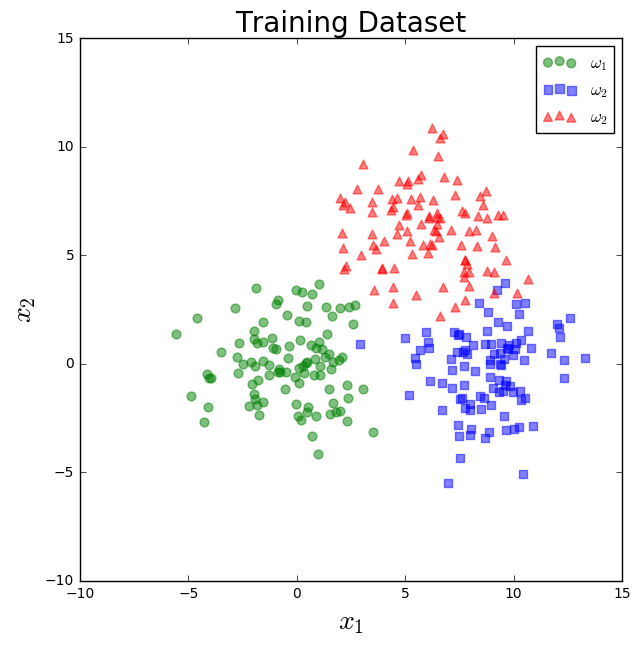

In [5]:
f, ax = plt.subplots(figsize=(7, 7))
ax.scatter(x1_samples[:,0], x1_samples[:,1], marker='o', color='green', s=40, alpha=0.5, label='$\omega_1$')
ax.scatter(x2_samples[:,0], x2_samples[:,1], marker='s', color='blue', s=40, alpha=0.5, label='$\omega_2$')
ax.scatter(x3_samples[:,0], x3_samples[:,1], marker='^', color='red', s=40, alpha=0.5, label='$\omega_2$')
plt.legend(loc='upper right') 
plt.title('Training Dataset', size=20)
plt.ylabel('$x_2$', size=20)
plt.xlabel('$x_1$', size=20)

### Defining the objective function and decision rule

Here, our **objective function** is to maximize the discriminant function $g_i(\pmb x)$, which we define as the posterior probability to perform a **minimum-error classification** (Bayes classifier). 

$$ g_1(\pmb x) = P(\omega_1 | \; \pmb{x}), \quad  g_2(\pmb{x}) = P(\omega_2 | \; \pmb{x}), \quad  g_3(\pmb{x}) = P(\omega_2 | \; \pmb{x})$$

So that our decision rule is to choose the class $\omega_i$ for which $g_i(\pmb x)$ is max., where  
$$ \quad g_i(\pmb{x}) = \pmb{x}^{\,t} \bigg( - \frac{1}{2} \Sigma_i^{-1} \bigg) \pmb{x} + \bigg( \Sigma_i^{-1} \pmb{\mu}_{\,i}\bigg)^t \pmb x + \bigg( -\frac{1}{2} \pmb{\mu}_{\,i}^{\,t}  \Sigma_{i}^{-1} \pmb{\mu}_{\,i} -\frac{1}{2} ln(|\Sigma_i|)\bigg)$$
 
### Implementing the discriminant function
Now, let us implement the discriminant function for $g_i(\pmb x)$ in Python code:

In [6]:
def discriminant_function(x_vec, cov_mat, mu_vec):
    """
    Calculates the value of the discriminant function for a dx1 dimensional
    sample given the covariance matrix and mean vector.
    
    Keyword arguments:
        x_vec: A dx1 dimensional numpy array representing the sample.
        cov_mat: numpy array of the covariance matrix.
        mu_vec: dx1 dimensional numpy array of the sample mean.
    
    Returns a float value as result of the discriminant function.
    
    """
    W_i = (-1/2) * np.linalg.inv(cov_mat)
    assert(W_i.shape[0] > 1 and W_i.shape[1] > 1), 'W_i must be a matrix'
    
    w_i = np.linalg.inv(cov_mat).dot(mu_vec)
    assert(w_i.shape[0] > 1 and w_i.shape[1] == 1), 'w_i must be a column vector'
    
    omega_i_p1 = (((-1/2) * (mu_vec).T).dot(np.linalg.inv(cov_mat))).dot(mu_vec)
    omega_i_p2 = (-1/2) * np.log(np.linalg.det(cov_mat))
    omega_i = omega_i_p1 - omega_i_p2
    assert(omega_i.shape == (1, 1)), 'omega_i must be a scalar'
    
    g = ((x_vec.T).dot(W_i)).dot(x_vec) + (w_i.T).dot(x_vec) + omega_i
    return float(g)

### Implementing the decision rule (classifier)
Next, we need to implement the code that returns the max. $g_i(\pmb x)$ with the corresponding class label:

In [7]:
def classify_data(x_vec, g, mu_vecs, cov_mats):
    """
    Classifies an input sample into 1 out of 3 classes determined by
    maximizing the discriminant function g_i().
    
    Keyword arguments:
        x_vec: A dx1 dimensional numpy array representing the sample.
        g: The discriminant function.
        mu_vecs: A list of mean vectors as input for g.
        cov_mats: A list of covariance matrices as input for g.
    
    Returns a tuple (g_i()_value, class label).
    
    """
    assert(len(mu_vecs) == len(cov_mats)), 'Number of mu_vecs and cov_mats must be equal.'
    
    g_vals = []
    for m,c in zip(mu_vecs, cov_mats): 
        g_vals.append(g(x_vec, mu_vec=m, cov_mat=c))
    
    max_index, max_value = max(enumerate(g_vals), key=operator.itemgetter(1))
    return (max_value, max_index + 1)

### Classifying the sample data
Using the discriminant function and classifier that we just implemented above, let us classify our sample data. (I have to apologize for the long code below, but I thought it makes it a little more clear of what exactly is going on)

In [8]:
class1_as_1 = 0
class1_as_2 = 0
class1_as_3 = 0
for row in x1_samples:
    g = classify_data(
        row, 
        discriminant_function,
        [mu_vec1, mu_vec2, mu_vec3],
        [cov_mat1, cov_mat2, cov_mat3]
    )
    if g[1] == 2:
        class1_as_2 += 1
    elif g[1] == 3:
        class1_as_3 += 1
    else:
        class1_as_1 += 1

class2_as_1 = 0
class2_as_2 = 0
class2_as_3 = 0
for row in x2_samples:
    g = classify_data(
        row, 
        discriminant_function,
        [mu_vec1, mu_vec2, mu_vec3],
        [cov_mat1, cov_mat2, cov_mat3]
    )
    if g[1] == 2:
        class2_as_2 += 1
    elif g[1] == 3:
        class2_as_3 += 1
    else:
        class2_as_1 += 1

class3_as_1 = 0
class3_as_2 = 0
class3_as_3 = 0
for row in x3_samples:
    g = classify_data(
        row, 
        discriminant_function,
        [mu_vec1, mu_vec2, mu_vec3],
        [cov_mat1, cov_mat2, cov_mat3]
    )
    if g[1] == 2:
        class3_as_2 += 1
    elif g[1] == 3:
        class3_as_3 += 1
    else:
        class3_as_1 += 1

import prettytable

confusion_mat = prettytable.PrettyTable(["sample dataset", "w1 (predicted)", "w2 (predicted)", "w3 (predicted)"])
confusion_mat.add_row(["w1 (actual)",class1_as_1, class1_as_2, class1_as_3])
confusion_mat.add_row(["w2 (actual)",class2_as_1, class2_as_2, class2_as_3])
confusion_mat.add_row(["w3 (actual)",class3_as_1, class3_as_2, class3_as_3])
print(confusion_mat)
misclass = x1_samples.shape[0]*3 - class1_as_1 - class2_as_2 - class3_as_3
bayes_err = misclass / (len(x1_samples)*3)
print('Empirical Error: {:.2f} ({:.2f}%)'.format(bayes_err, bayes_err * 100))

+----------------+----------------+----------------+----------------+
| sample dataset | w1 (predicted) | w2 (predicted) | w3 (predicted) |
+----------------+----------------+----------------+----------------+
|  w1 (actual)   |       99       |       0        |       1        |
|  w2 (actual)   |       1        |       96       |       3        |
|  w3 (actual)   |       0        |       2        |       98       |
+----------------+----------------+----------------+----------------+
Empirical Error: 0.02 (2.33%)


### 2) Assuming that the parameters are unknown - using MLE
In contrast to the first section, let us assume that we only know the number of parameters for the class conditional densities $p (\; \pmb x \; | \; \omega_i)$, and we want to use a Maximum Likelihood Estimation (MLE) to estimate the quantities of these parameters from the training data (*here:* our random sample data). Given the information about the form of the model - the data is normal distributed - the 2 parameters to be estimated are $\pmb \mu_i$ and $\pmb \Sigma_i$, which are summarized by the parameter vector 
$$\pmb \theta_i = \bigg[ \begin{array}{c}
\ \theta_{i1} \\
\ \theta_{i2} \\
\end{array} \bigg]=
\bigg[ \begin{array}{c}
\pmb \mu_i \\
\pmb \Sigma_i \\
\end{array} \bigg]$$

For the Maximum Likelihood Estimate (MLE), we assume that we have a set of samples $D = \left\{ \pmb x_1, \pmb x_2,..., \pmb x_n \right\} $ that are *i.i.d.* (independent and identically distributed, drawn with probability $p(\pmb x \; | \; \omega_i, \; \pmb \theta_i) $). Thus, we can **work with each class separately** and omit the class labels, so that we write the probability density as $$p(\pmb x \; | \; \pmb \theta)$$

hus, the probability of observing $D = \left\{ \pmb x_1, \pmb x_2,..., \pmb x_n \right\} $ is: 
<br>
<br>
$$p(D\; | \;  \pmb \theta\;) = p(\pmb x_1 \; | \; \pmb \theta\;)\; \cdot \; p(\pmb x_2 \; | \;\pmb \theta\;) \; \cdot \;...  \; p(\pmb x_n \; | \; \pmb \theta\;) = \prod_{k=1}^{n} \; p(\pmb x_k \pmb \; | \; \pmb \theta \;)$$  
<br>
Where $p(D\; | \;  \pmb  \theta\;)$ is also called the ***likelihood of $\pmb\ \theta$***.

We are given the information that $p([x_1,x_2]^t) \;∼ \; N(\pmb \mu,\pmb \Sigma) $ (remember that we dropped the class labels, since we are working with every class separately).

And the mutlivariate normal density is given as:
$$\quad \quad p(\pmb x) = \frac{1}{(2\pi)^{d/2} \; |\Sigma|^{1/2}} exp \bigg[ -\frac{1}{2}(\pmb x - \pmb \mu)^t \Sigma^{-1}(\pmb x - \pmb \mu) \bigg]$$

So that  
$$p(D\; | \;  \pmb \theta\;) = \prod_{k=1}^{n} \; p(\pmb x_k \pmb \; | \; \pmb \theta \;) =  \prod_{k=1}^{n} \; \frac{1}{(2\pi)^{d/2} \; |\Sigma|^{1/2}} exp \bigg[ -\frac{1}{2}(\pmb x - \pmb \mu)^t \Sigma^{-1}(\pmb x - \pmb \mu) \bigg]$$

and the log of the multivariate density
$$ l(\pmb\theta) =  \sum\limits_{k=1}^{n} - \frac{1}{2}(\pmb x - \pmb \mu)^t \pmb \Sigma^{-1} \; (\pmb x - \pmb \mu) - \frac{d}{2} \; ln \; 2\pi - \frac{1}{2} \;ln \; |\pmb\Sigma|$$

In order to obtain the MLE $\boldsymbol{\hat{\theta}}$, we maximize $l (\pmb  \theta)$, which can be done via differentiation:

with 
$$\nabla_{\pmb \theta} \equiv \begin{bmatrix}  
\frac{\partial \; }{\partial \; \theta_1} \\ 
\frac{\partial \; }{\partial \; \theta_2}
\end{bmatrix} = \begin{bmatrix} 
\frac{\partial \; }{\partial \; \pmb \mu} \\ 
\frac{\partial \; }{\partial \; \pmb \sigma}
\end{bmatrix}$$
$$\nabla_{\pmb \theta} l = \sum\limits_{k=1}^n \nabla_{\pmb \theta} \;ln\; p(\pmb x| \pmb \theta) = 0 $$

## MLE of the mean vector $\pmb \mu$
After doing the differentiation, we find that the MLE of the parameter $\pmb\mu$ is given by the equation:  
$${\hat{\pmb\mu}} = \frac{1}{n} \sum\limits_{k=1}^{n} \pmb x_k$$

As you can see, this is simply the mean of our dataset, so we can implement the code very easily and compare the estimate to the actual values for $\pmb \mu$.

In [9]:
mu_est1 = np.array([[sum(x1_samples[:,0])/len(x1_samples[:,0])],[sum(x1_samples[:,1])/len(x1_samples[:,1])]])
mu_est2 = np.array([[sum(x2_samples[:,0])/len(x2_samples[:,0])],[sum(x2_samples[:,1])/len(x2_samples[:,1])]])
mu_est3 = np.array([[sum(x3_samples[:,0])/len(x3_samples[:,0])],[sum(x3_samples[:,1])/len(x3_samples[:,1])]])

mu_mle = prettytable.PrettyTable(["", "mu_1", "mu_2", "mu_3"])
mu_mle.add_row(["MLE",mu_est1, mu_est2, mu_est3])
mu_mle.add_row(["actual",mu_vec1, mu_vec2, mu_vec3])

print(mu_mle)

+--------+-----------------+-----------------+-----------------+
|        |       mu_1      |       mu_2      |       mu_3      |
+--------+-----------------+-----------------+-----------------+
|  MLE   |  [[-0.34091097] |  [[ 8.80730361] |  [[ 5.98918805] |
|        |  [ 0.02617762]] |  [-0.28389995]] |  [ 6.194607  ]] |
| actual |       [[0]      |       [[9]      |       [[6]      |
|        |       [0]]      |       [0]]      |       [6]]      |
+--------+-----------------+-----------------+-----------------+


## MLE of the covariance matrix $\pmb \Sigma$

Analog to $\pmb \mu$ we can find the equation for the $\pmb\Sigma$ via differentiation - okay the equations are a little bit more involved, but the approach is the same - so that we come to this equation:  

$${\hat{\pmb\Sigma}} = \frac{1}{n} \sum\limits_{k=1}^{n} (\pmb x_k - \hat{\mu})(\pmb x_k - \hat{\mu})^t$$

which we will also implement in Python code, and then compare to the acutal values of ${\pmb\Sigma}$.

In [10]:
def mle_est_cov(x_samples, mu_est):
    """
    Calculates the Maximum Likelihood Estimate for the covariance matrix.
    
    Keyword Arguments:
        x_samples: np.array of the samples for 1 class, n x d dimensional 
        mu_est: np.array of the mean MLE, d x 1 dimensional
        
    Returns the MLE for the covariance matrix as d x d numpy array.
    
    """
    cov_est = np.zeros((2,2))
    for x_vec in x_samples:
        x_vec = x_vec.reshape(2,1)
        assert(x_vec.shape == mu_est.shape), 'mean and x vector hmust be of equal shape'
        cov_est += (x_vec - mu_est).dot((x_vec - mu_est).T)
    return cov_est / len(x_samples)

cov_est1 = mle_est_cov(x1_samples, mu_est1)
cov_est2 = mle_est_cov(x2_samples, mu_est2)
cov_est3 = mle_est_cov(x3_samples, mu_est3)

cov_mle = prettytable.PrettyTable(["", "covariance_matrix_1", "covariance_matrix_2", "covariance_matrix_3"])
cov_mle.add_row(["MLE", cov_est1, cov_est2, cov_est3])
cov_mle.add_row(['','','',''])
cov_mle.add_row(["actual", cov_mat1, cov_mat2, cov_mat3])

print(cov_mle)

+--------+-----------------------------+-----------------------------+-----------------------------+
|        |     covariance_matrix_1     |     covariance_matrix_2     |     covariance_matrix_3     |
+--------+-----------------------------+-----------------------------+-----------------------------+
|  MLE   |  [[ 3.79760541 -0.04062998] |  [[ 3.26970408  0.38456157] |  [[ 4.41566328 -0.63420053] |
|        |  [-0.04062998  3.05143476]] |  [ 0.38456157  3.33256456]] |  [-0.63420053  3.38644008]] |
|        |                             |                             |                             |
| actual |            [[3 0]           |            [[3 0]           |            [[4 0]           |
|        |            [0 3]]           |            [0 3]]           |            [0 4]]           |
+--------+-----------------------------+-----------------------------+-----------------------------+


## Classification using our estimated parameters

Using the estimated parameters $\pmb \mu_i$ and $\pmb \Sigma_i$, which we obtained via MLE, we calculate the error on the sample dataset again. 

In [11]:
class1_as_1 = 0
class1_as_2 = 0
class1_as_3 = 0
for row in x1_samples:
    g = classify_data(
        row, 
        discriminant_function,
        [mu_est1, mu_est2, mu_est3],
        [cov_est1, cov_est2, cov_est3]
    )
    if g[1] == 2:
        class1_as_2 += 1
    elif g[1] == 3:
        class1_as_3 += 1
    else:
        class1_as_1 += 1

class2_as_1 = 0
class2_as_2 = 0
class2_as_3 = 0
for row in x2_samples:
    g = classify_data(
        row, 
        discriminant_function,
        [mu_est1, mu_est2, mu_est3],
        [cov_est1, cov_est2, cov_est3]
    )
    if g[1] == 2:
        class2_as_2 += 1
    elif g[1] == 3:
        class2_as_3 += 1
    else:
        class2_as_1 += 1

class3_as_1 = 0
class3_as_2 = 0
class3_as_3 = 0
for row in x3_samples:
    g = classify_data(
        row, 
        discriminant_function,
        [mu_est1, mu_est2, mu_est3],
        [cov_est1, cov_est2, cov_est3]
    )
    if g[1] == 2:
        class3_as_2 += 1
    elif g[1] == 3:
        class3_as_3 += 1
    else:
        class3_as_1 += 1
confusion_mat = prettytable.PrettyTable(["sample dataset", "w1 (predicted)", "w2 (predicted)", "w3 (predicted)"])
confusion_mat.add_row(["w1 (actual)",class1_as_1, class1_as_2, class1_as_3])
confusion_mat.add_row(["w2 (actual)",class2_as_1, class2_as_2, class2_as_3])
confusion_mat.add_row(["w3 (actual)",class3_as_1, class3_as_2, class3_as_3])
print(confusion_mat)
misclass = x1_samples.shape[0]*3 - class1_as_1 - class2_as_2 - class3_as_3
bayes_err = misclass / (len(x1_samples)*3)
print('Empirical Error: {:.2f} ({:.2f}%)'.format(bayes_err, bayes_err * 100))

+----------------+----------------+----------------+----------------+
| sample dataset | w1 (predicted) | w2 (predicted) | w3 (predicted) |
+----------------+----------------+----------------+----------------+
|  w1 (actual)   |      100       |       0        |       0        |
|  w2 (actual)   |       1        |       97       |       2        |
|  w3 (actual)   |       0        |       2        |       98       |
+----------------+----------------+----------------+----------------+
Empirical Error: 0.02 (1.67%)


### Conclusion
I would claim that the results look pretty good! The error rate on our random dataset increased by just 0.67% (from 4.00% to 4.67%) when we estimated $\pmb \mu$ and $\pmb \Sigma$ using MLE.  
In a real application of course, we would have an separate training dataset to derive and estimate the parameters, and a test data set for calculating the error rate. However, I ommitted the usage of to separate datasets here for the sake of brevity.